# Predikcija plata u ekonomski razvijenim državama

**Autori:** Katarina Perović E2 131/2024, Milica Petrović E2 124/2024, Ana Radovanović E2 158/2024

**Predmet:** SIAP 

**1.Uvoz biblioteka**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys  
!{sys.executable} -m pip install seaborn

import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


[notice] A new release of pip is available: 23.3.1 -> 25.2
[notice] To update, run: C:\Users\Katarina\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## 2. Učitavanje i osnovna analiza podataka

In [2]:
df = pd.read_csv("Salary.csv")
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6684 non-null   float64
 1   Gender               6684 non-null   object 
 2   Education Level      6684 non-null   int64  
 3   Job Title            6684 non-null   object 
 4   Years of Experience  6684 non-null   float64
 5   Salary               6684 non-null   float64
 6   Country              6684 non-null   object 
 7   Race                 6684 non-null   object 
 8   Senior               6684 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 470.1+ KB


,Age,Education Level,Years of Experience,Salary,Senior
count,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000
mean,33.610563,1.622382,8.077723,115307.175194,0.143477
std,7.595994,0.880474,6.029305,52806.810881,0.350585
min,21.000000,0.000000,0.000000,350.000000,0.000000
25%,28.000000,1.000000,3.000000,70000.000000,0.000000
50%,32.000000,1.000000,7.000000,115000.000000,0.000000
75%,38.000000,2.000000,12.000000,160000.000000,0.000000
max,62.000000,3.000000,34.000000,250000.000000,1.000000


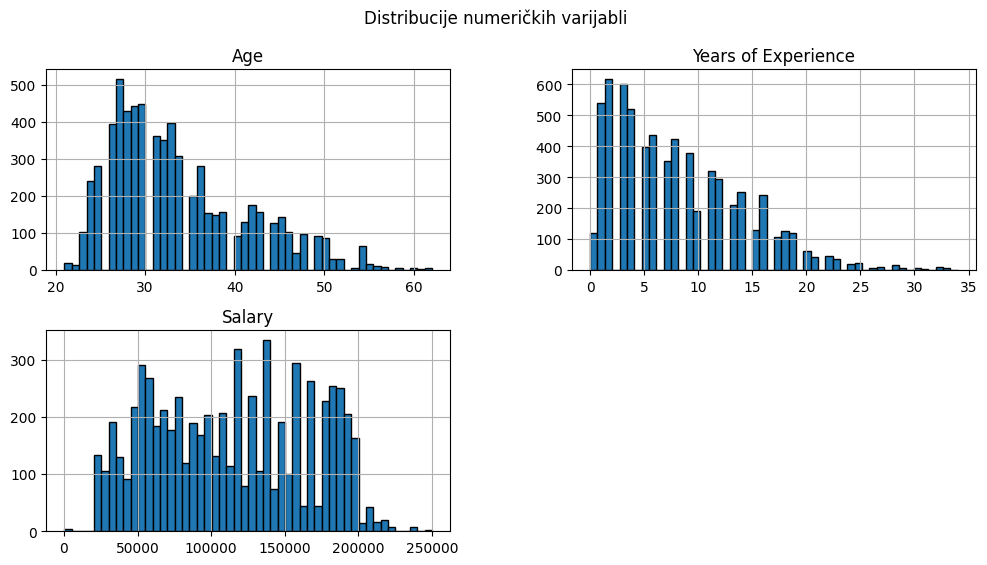

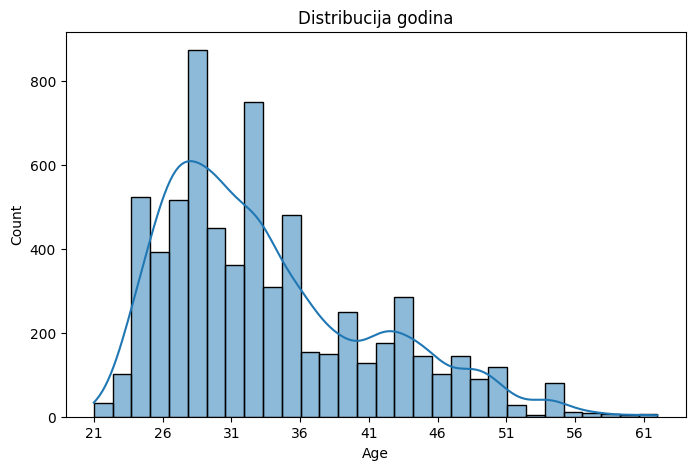

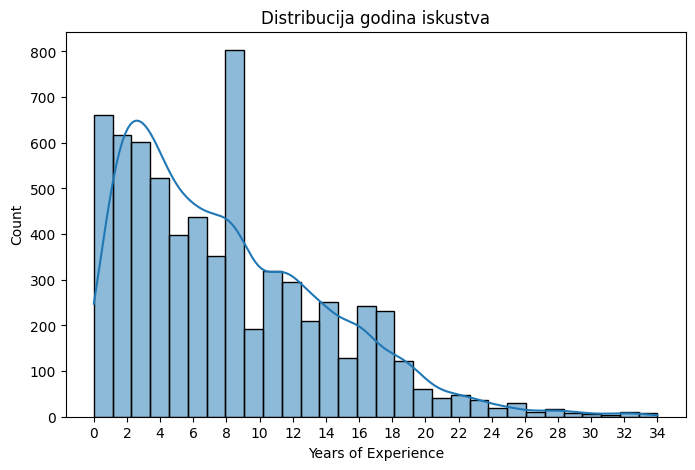

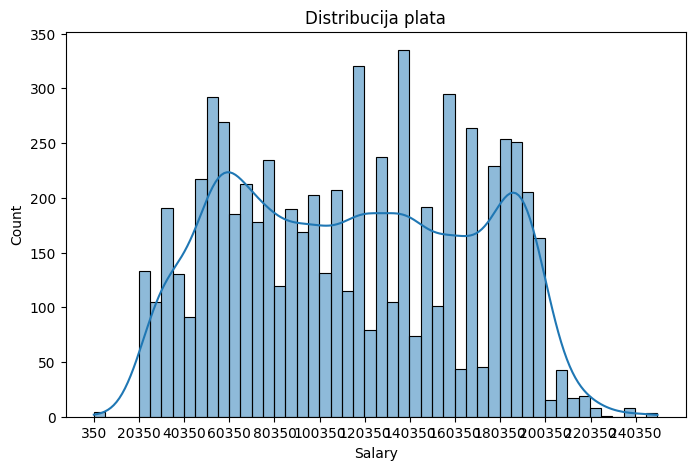

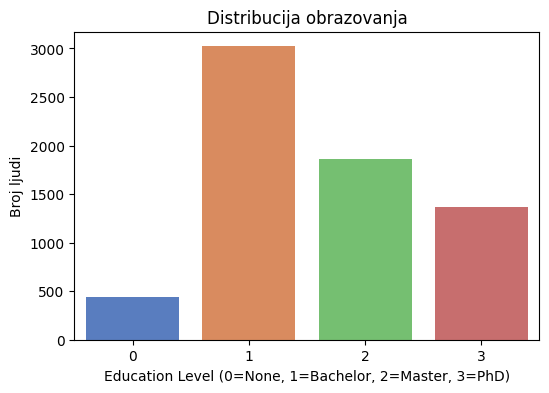

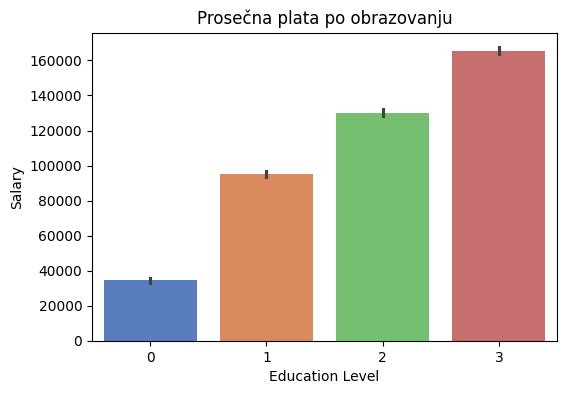

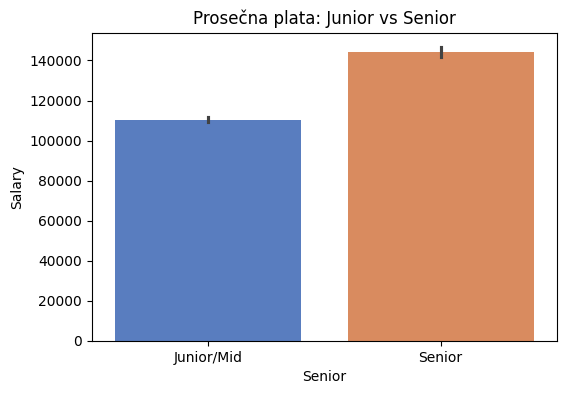

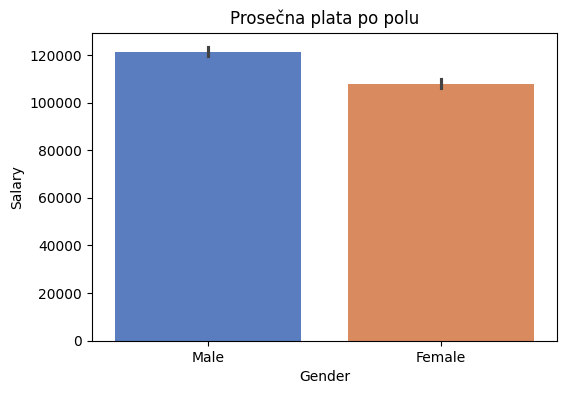

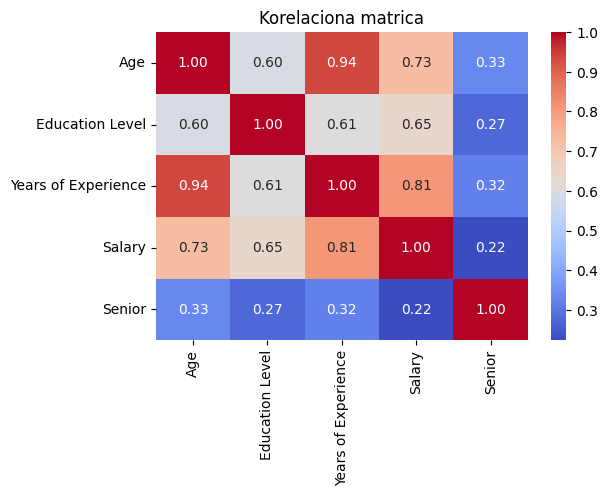

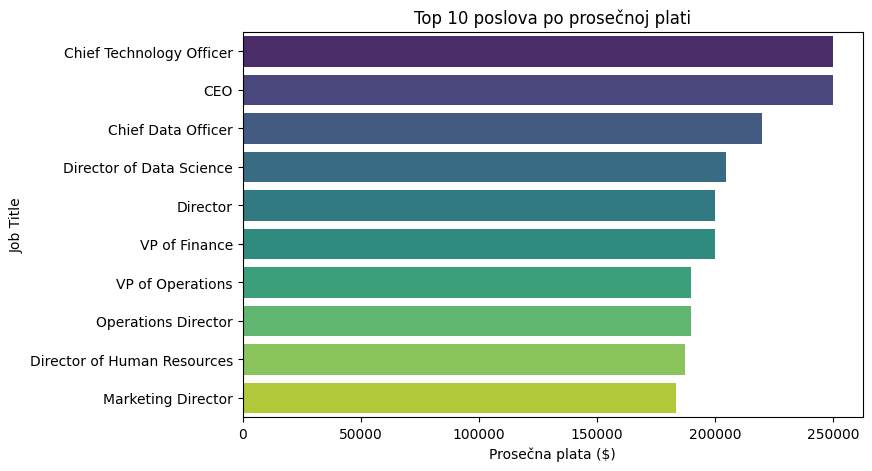

In [ ]:
num_cols = ["Age", "Years of Experience", "Salary"]
df[num_cols].hist(bins=50, figsize=(12,6), edgecolor="black")
plt.suptitle("Distribucije numeričkih varijabli")
plt.show()

# ---- Age ----
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Distribucija godina")
plt.xticks(np.arange(int(df["Age"].min()), int(df["Age"].max())+1, 4))  # korak 5
plt.show()

# ---- Years of Experience ----
plt.figure(figsize=(8,5))
sns.histplot(df["Years of Experience"], bins=30, kde=True)
plt.title("Distribucija godina iskustva")
plt.xticks(np.arange(int(df["Years of Experience"].min()), int(df["Years of Experience"].max())+1, 2))  # korak 2
plt.show()

# ---- Salary ----
plt.figure(figsize=(8,5))
sns.histplot(df["Salary"], bins=50, kde=True)
plt.title("Distribucija plata")
plt.xticks(np.arange(int(df["Salary"].min()), int(df["Salary"].max())+1, 20000))  # korak 20000
plt.show()



# 3. Distribucija obrazovanja
plt.figure(figsize=(6,4))
sns.countplot(x="Education Level", data=df, hue="Education Level", legend=False, palette="muted")
plt.title("Distribucija obrazovanja")
plt.xlabel("Education Level (0=None, 1=Bachelor, 2=Master, 3=PhD)")
plt.ylabel("Broj ljudi")
plt.show()


# 4. Prosečna plata po nivou obrazovanja
plt.figure(figsize=(6,4))
sns.barplot(x="Education Level", y="Salary", data=df,
            estimator="mean", hue="Education Level", legend=False, palette="muted")
plt.title("Prosečna plata po obrazovanju")
plt.show()


# 5. Prosečna plata po Senior statusu
plt.figure(figsize=(6,4))
sns.barplot(x="Senior", y="Salary", data=df,
            estimator="mean", hue="Senior", legend=False, palette="muted")
plt.title("Prosečna plata: Junior vs Senior")
plt.xticks([0,1], ["Junior/Mid", "Senior"])
plt.show()

# 6. Prosečna plata po polu
plt.figure(figsize=(6,4))
sns.barplot(x="Gender", y="Salary", data=df,
            estimator="mean", hue="Gender", legend=False, palette="muted")
plt.title("Prosečna plata po polu")
plt.show()

# 8. Korelaciona matrica za numeričke varijable
plt.figure(figsize=(6,4))
corr = df[["Age", "Education Level", "Years of Experience", "Salary", "Senior"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelaciona matrica")
plt.show()

# 9. Top 10 job title po prosečnoj plati
top_jobs = df.groupby("Job Title")["Salary"].mean().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x="Salary", y="Job Title", data=top_jobs,
            hue="Job Title", legend=False, palette="viridis")
plt.title("Top 10 poslova po prosečnoj plati")
plt.xlabel("Prosečna plata ($)")
plt.ylabel("Job Title")
plt.show()
